In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 6
             }
plt.rcParams.update(parameters)

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?

In [2]:
# Not yet done, but please dont erase; im working on it! 

# C = lambda b, R: sum(b[i]*R[i] for i in range(len(Rs))

# def deriv(state, t, *params):
#     eps, bs, ds, rs, Ks nR = params
#     Rs, Ns = state[:nR], state[nR:]
#     C = lambda : sum(R[i]*bs[i,j] for i in range(len(Rs))
#     dR_dt = np.zeros(nR)
#     dN_dt = np.zeros(len(state) - nR)
#     for iR, R in enumerate(Rs):
#         dR_dt[iR] = rs[iR]*(K[iR] - R) - sum(C(b[j]*R[j]))
#     
#     dN_dt = r*N - b*N*P
#     return np.array([dP_dt, dN_dt])

In [3]:
# Solve for the equilibrium abundances of prey and predator
#N = Symbol('N')
#P = Symbol('P')
#solve([eps*b*N*P - d*P, r*N - b*N*P])

In [4]:
def deriv(state, t, *params):
    eps, bs, ds, c_max, r, K, nR = params
    Rs, Ns = state[:nR], state[nR:]
    R = Rs[0]
    #for i in range(Ns):
    #    print(Ns[i])
    C = lambda i: R*bs[i]*c_max[i]/(R*bs[i] + c_max[i])
    dR_dt = r*(K - R) - sum(C(i)*Ns[i] for i in range(len(Ns)))
    dN_dt = np.zeros(len(Ns))
    for iN, N in enumerate(Ns):
        dN_dt[iN] = eps[iN]*C(iN)*N - ds[iN]*N
    return np.array([dR_dt, *dN_dt])

In [5]:
# parameter considerations:

yr = 365 # day/yr
feed_freq = 1 # 1/day (eats every day)
feed_quant = 0.01 # g (single meal quant)
feed_yr = feed_quant*feed_freq*yr # g/yr

offspring = 4 # offspr/(beetle*yr) 
eps = [offspring/feed_yr]*2 # 1/g  # Unit: [#N/g]
print(eps)
eps = [0.8, 0.9]
print(eps)

bs = [0.1, 0.1] # sqm /(day*beetle) 
bs = [yr*i for i in bs] # sqm /(yr*beetle) # Unit: [sqm/(year*#N)]
print(bs)


ds = [1.]*2 #  (lifespan 1 yr) # Unit: [1/yr]

c_maxs = [0.15, 0.1] # g/(beetle*day)
c_maxs = [yr*i for i in c_maxs] # g/(beetle*yr) # Unit: [g/(year*#N)]
print(c_maxs)

r = 5 # Unit: [1/yr]
K = 1e2 # Unit: [g/sqm]

nR = 1 # number of distinct resources

V = 20 # Unit: [sqm]
# All units: 
    # N1: [#N1/sqm], N2: [#N2/sqm], R: [g/sqm]
    # r: [1/yr], b: [sqm/(year*#N)], cmax: [g/(year*#N)], d: [1/yr], eps: [#N/g]

[1.095890410958904, 1.095890410958904]
[0.8, 0.9]
[36.5, 36.5]
[54.75, 36.5]


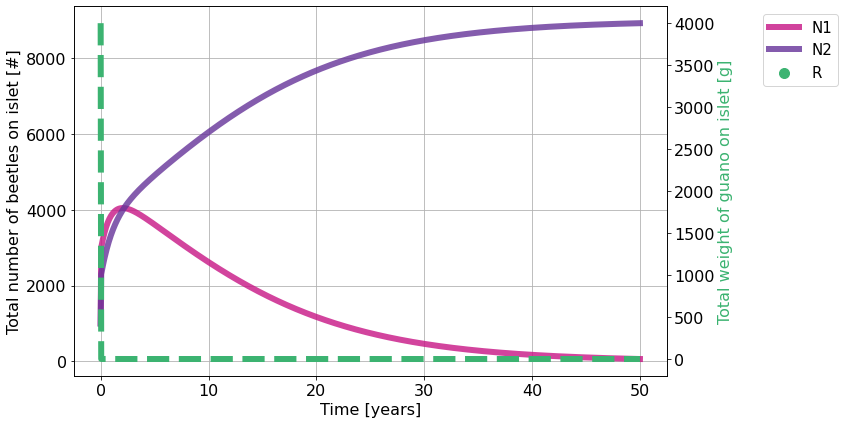

In [6]:
init_state = [200, 50, 50]
t = np.linspace(0, 50, 1000)
params = (eps, bs, ds, c_maxs, r, K, nR )

# deriv(init_state, t, *params)

sol = odeint(deriv, init_state, t, params).T
R, N1, N2 = sol



fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
#ax1.set_ylim(0, 5000)
ax1.grid()

ax2.plot(t, R*V, label="R", color = 'mediumseagreen', linestyle="--")
ax1.plot(t, N1*V, label="N1", color = 'mediumvioletred', alpha=0.8)
ax1.plot(t, N2*V, label="N2", color = 'rebeccapurple', alpha=0.8)
ax1.scatter([], [], s=100, label="R", color = 'mediumseagreen')

ax1.set_ylabel('Total number of beetles on islet [#]')
ax2.set_ylabel('Total weight of guano on islet [g]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [years]') 

ax1.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15) 

In [7]:
print(sol)

[[2.00000000e+02 5.38696333e-02 5.23041461e-02 ... 3.14235134e-02
  3.14233801e-02 3.14232475e-02]
 [5.00000000e+01 1.50176299e+02 1.53956933e+02 ... 3.18613706e+00
  3.17002988e+00 3.15400354e+00]
 [5.00000000e+01 1.15084757e+02 1.18923460e+02 ... 4.46274179e+02
  4.46292301e+02 4.46310331e+02]]


In [8]:
def deriv(state, t, *params):
    eps, bs, ds, c_max, r, K, nR = params
    Rs, Ns = state[:nR], state[nR:]
    
    R_char = lambda j: np.sum([bs[j][i]*Rs[i] for i in range(len(Rs))])
    C = lambda j: R_char(j)*c_max[j]/(R_char(j) + c_max[j])
    
    dR_dt = np.zeros(len(Rs))
    for iR, R in enumerate(Rs):
        dR_dt[iR] = r*(K - R) - sum(C(j)*Ns[j] for j in range(len(Ns)))
    
    dN_dt = np.zeros(len(Ns))
    for iN, N in enumerate(Ns):
        dN_dt[iN] = (eps[iN]*C(iN) - ds[iN])*N
    
    return np.array([*dR_dt, *dN_dt])

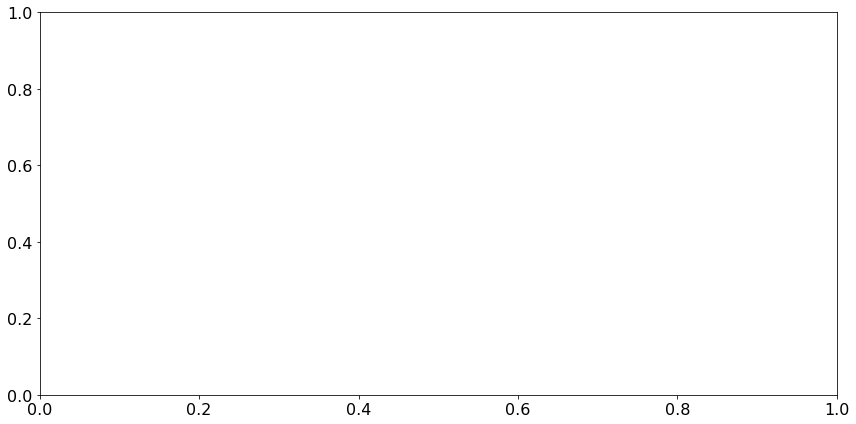

In [9]:
bs = np.array([[0.1, 0.12],[0.15, 0.1]]) # sqm /(day*beetle)
bs = np.multiply(bs, yr) # sqm /(yr*beetle)

c_maxs = [0.1, 0.5] # g/(beetle*day)
c_maxs = [yr*i for i in c_maxs] # g/(beetle*yr)

init_state = [100, 100, 50, 50]
nR = 2

params = (eps, bs, ds, c_maxs, r, K, nR )
sol = odeint(deriv, init_state, t, params).T
R1, R2, N1, N2 = sol

# print(R1)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2.plot(t, R1*V)# , label="R", color = 'mediumseagreen', linestyle="--")
ax2.plot(t, R2*V)# , label="R", color = 'mediumseagreen', linestyle="--")
ax2.plot(t, N1*V)# , label="R", color = 'mediumseagreen', linestyle="--")
ax2.plot(t, N2*V)# , label="R", color = 'mediumseagreen', linestyle="--")
